# Principal Component Analysis
<img src="pics\pca.pic0.png" width="800">

## Correct projection
<img src="pics\pca.pic1.png" width="450" align = 'left'>
<img src="pics\pca.pic2.png" width="450">

## Incorrect projection
<img src="pics\pca.pic3.png" width="450" align = 'left'>
<img src="pics\pca.pic4.png" width="470">
<img src="pics\pca.pic6.png" width="500" align = 'left'>
<img src="pics\pca.pic9.png" width="800" align = 'left'>
<img src="pics\pca.pic7.png" width="800" align = 'left'>
<img src="pics\pca.pic8.png" width="700">

# Further Reads

https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643 \
https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c \
https://www.youtube.com/watch?v=FgakZw6K1QQ

In [21]:
import numpy as np

class PCA:
    
    def __init__(self, n_component):
        self.n_component = n_component
        self.PCs = None
        self.mean = None
        
    def fit(self, X):
        #calculate means: shift the distribution to the origin (0,0,..)
        self.mean = np.mean(X, axis=0)
        X -= self.mean
        
        #calculate covariances
        cov = np.cov(X.T)
        
        #calculate eigen values, eigen vector
        eigenvalues, eigenvectors = np.linalg.eig(cov) 
        #eigenvector returned as column vector.
        
        #sort eigen vectors by eigen values
        eigenvectors = eigenvectors.T # turn vector into array(row) for index short
        sorted_idxs = np.argsort(eigenvalues)[::-1] # [::-1] to revert the array and get desc order
        eigenvalues = eigenvalues[sorted_idxs]
        eigenvectors = eigenvectors[sorted_idxs]
        
        #take first n eigen vectors with highest eigen values
        self.PCs = eigenvectors[:self.n_component].T # turn array vectors into column vectors
        
    
    def transform(self, X):
        X -= self.mean
        PCA_X = np.dot(X,self.PCs)
        return PCA_X

(150, 4)
(150, 2)


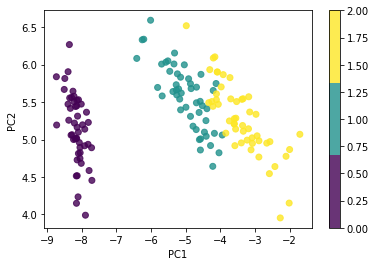

In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot  as plt

data = datasets.load_iris()
X = data.data
y = data.target

trans = PCA(2)
trans.fit(X)
print(X.shape)
pca_X = trans.transform(X)
print(pca_X.shape)

x1 = pca_X[:,0]
x2 = pca_X[:,1]

plt.scatter(x1, x2, c=y, alpha=0.8, cmap=plt.cm.get_cmap('viridis',3))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()